In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
train.head(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


In [6]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
train.shape

(4209, 378)

In [8]:
test.shape

(4209, 377)

In [9]:
train.isnull().values.any()

False

In [10]:
test.isnull().values.any()

False

#### Task 1: If for any column(s), the variance is equal to zero, we should remove those variable(s).

In [11]:
train1 = train.copy()
test1 = test.copy()

In [12]:
train2 = train1.loc[:,train1.apply(pd.Series.nunique) != 1] 

In [13]:
train1.shape

(4209, 378)

In [14]:
train2.shape

(4209, 366)

In [15]:
test2 = test1.loc[:,test1.apply(pd.Series.nunique) != 1] 

In [16]:
test2.shape

(4209, 372)

In [17]:
test1.shape

(4209, 377)

#### Task 2 : Check for null and unique values for test and train sets.

In [18]:
train2.isnull().values.any()

False

In [19]:
test2.isnull().values.any()

False

#### Task 3 : Apply label encoder.

In [20]:
train2.dtypes.unique()


array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [21]:
test2.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

In [22]:
train2_num = train2.select_dtypes(include=['int64','float64'])
train2_cat = train2.select_dtypes(include = 'object')

In [23]:
test2_num = train2.select_dtypes(include=['int64','float64'])
test2_cat = train2.select_dtypes(include = 'object')

In [24]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [25]:
train_cat = train2_cat.apply(label_encoder.fit_transform)

In [26]:
test_cat = test2_cat.apply(label_encoder.fit_transform)

In [27]:
train_cat.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13


### Task 4: Perform dimensionality reduction.

In [28]:
train3 = pd.concat([train_cat,train2_num], axis = 1)

In [29]:
test3 = pd.concat([test_cat,test2_num], axis = 1)

##### Principal Component Analysis

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
scaler.fit(train3)
scaler.fit(test3)

StandardScaler()

In [32]:
scaled_data_train = scaler.transform(train3)
scaled_data_test = scaler.transform(test3)

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components = 175)

In [35]:
train_pca = pca.fit_transform(scaled_data_train)
test_pca = pca.fit_transform(scaled_data_test)

In [36]:
train_pca.shape

(4209, 175)

In [37]:
test_pca.shape

(4209, 175)

In [38]:
# Dataframe

In [39]:
pca_train_df = pd.DataFrame(train_pca)

In [40]:
pca_test_df = pd.DataFrame(test_pca)

In [41]:
pca_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,12.353130,-2.935300,-0.958584,1.877987,-1.133357,-3.802641,9.033557,-3.586901,-16.154667,8.455026,...,0.345694,0.351666,-0.213625,0.188970,-0.306970,0.081259,0.657750,-0.639783,-0.656425,-0.180209
1,-0.144770,0.444027,0.900783,1.333713,-2.572785,-0.197730,1.009563,-0.595030,-0.485391,0.150978,...,-1.981649,-0.232210,-0.423427,1.259902,0.194560,1.478714,-0.696167,-0.445098,-0.954324,-1.282099
2,9.922351,21.432498,-4.582107,-4.581799,0.600137,2.660913,1.146675,3.645686,-0.922956,1.311941,...,0.077152,0.441433,0.056802,-0.791114,0.380088,-0.090674,0.670993,0.056993,-0.241737,0.326070
3,7.011290,21.645855,-5.531054,-0.071343,2.114276,0.656492,0.415246,-0.034719,0.174028,2.932282,...,0.296382,0.065552,0.340573,-0.039912,-0.385141,0.155632,-0.013530,-0.127392,0.316227,-0.080004
4,6.215247,21.739795,-6.088647,0.605994,2.196022,-0.077214,-0.991484,-0.230555,0.879466,0.814801,...,-0.894367,1.753501,-1.522697,2.557603,0.399926,-0.607704,-0.640043,-0.786670,-0.230425,1.316221


In [42]:
# pca.explained_variance_ratio_*100

In [43]:
(pca.explained_variance_ratio_*100).sum()

97.66374511740861

#### Dimensionality reduction using correlation

<AxesSubplot:>

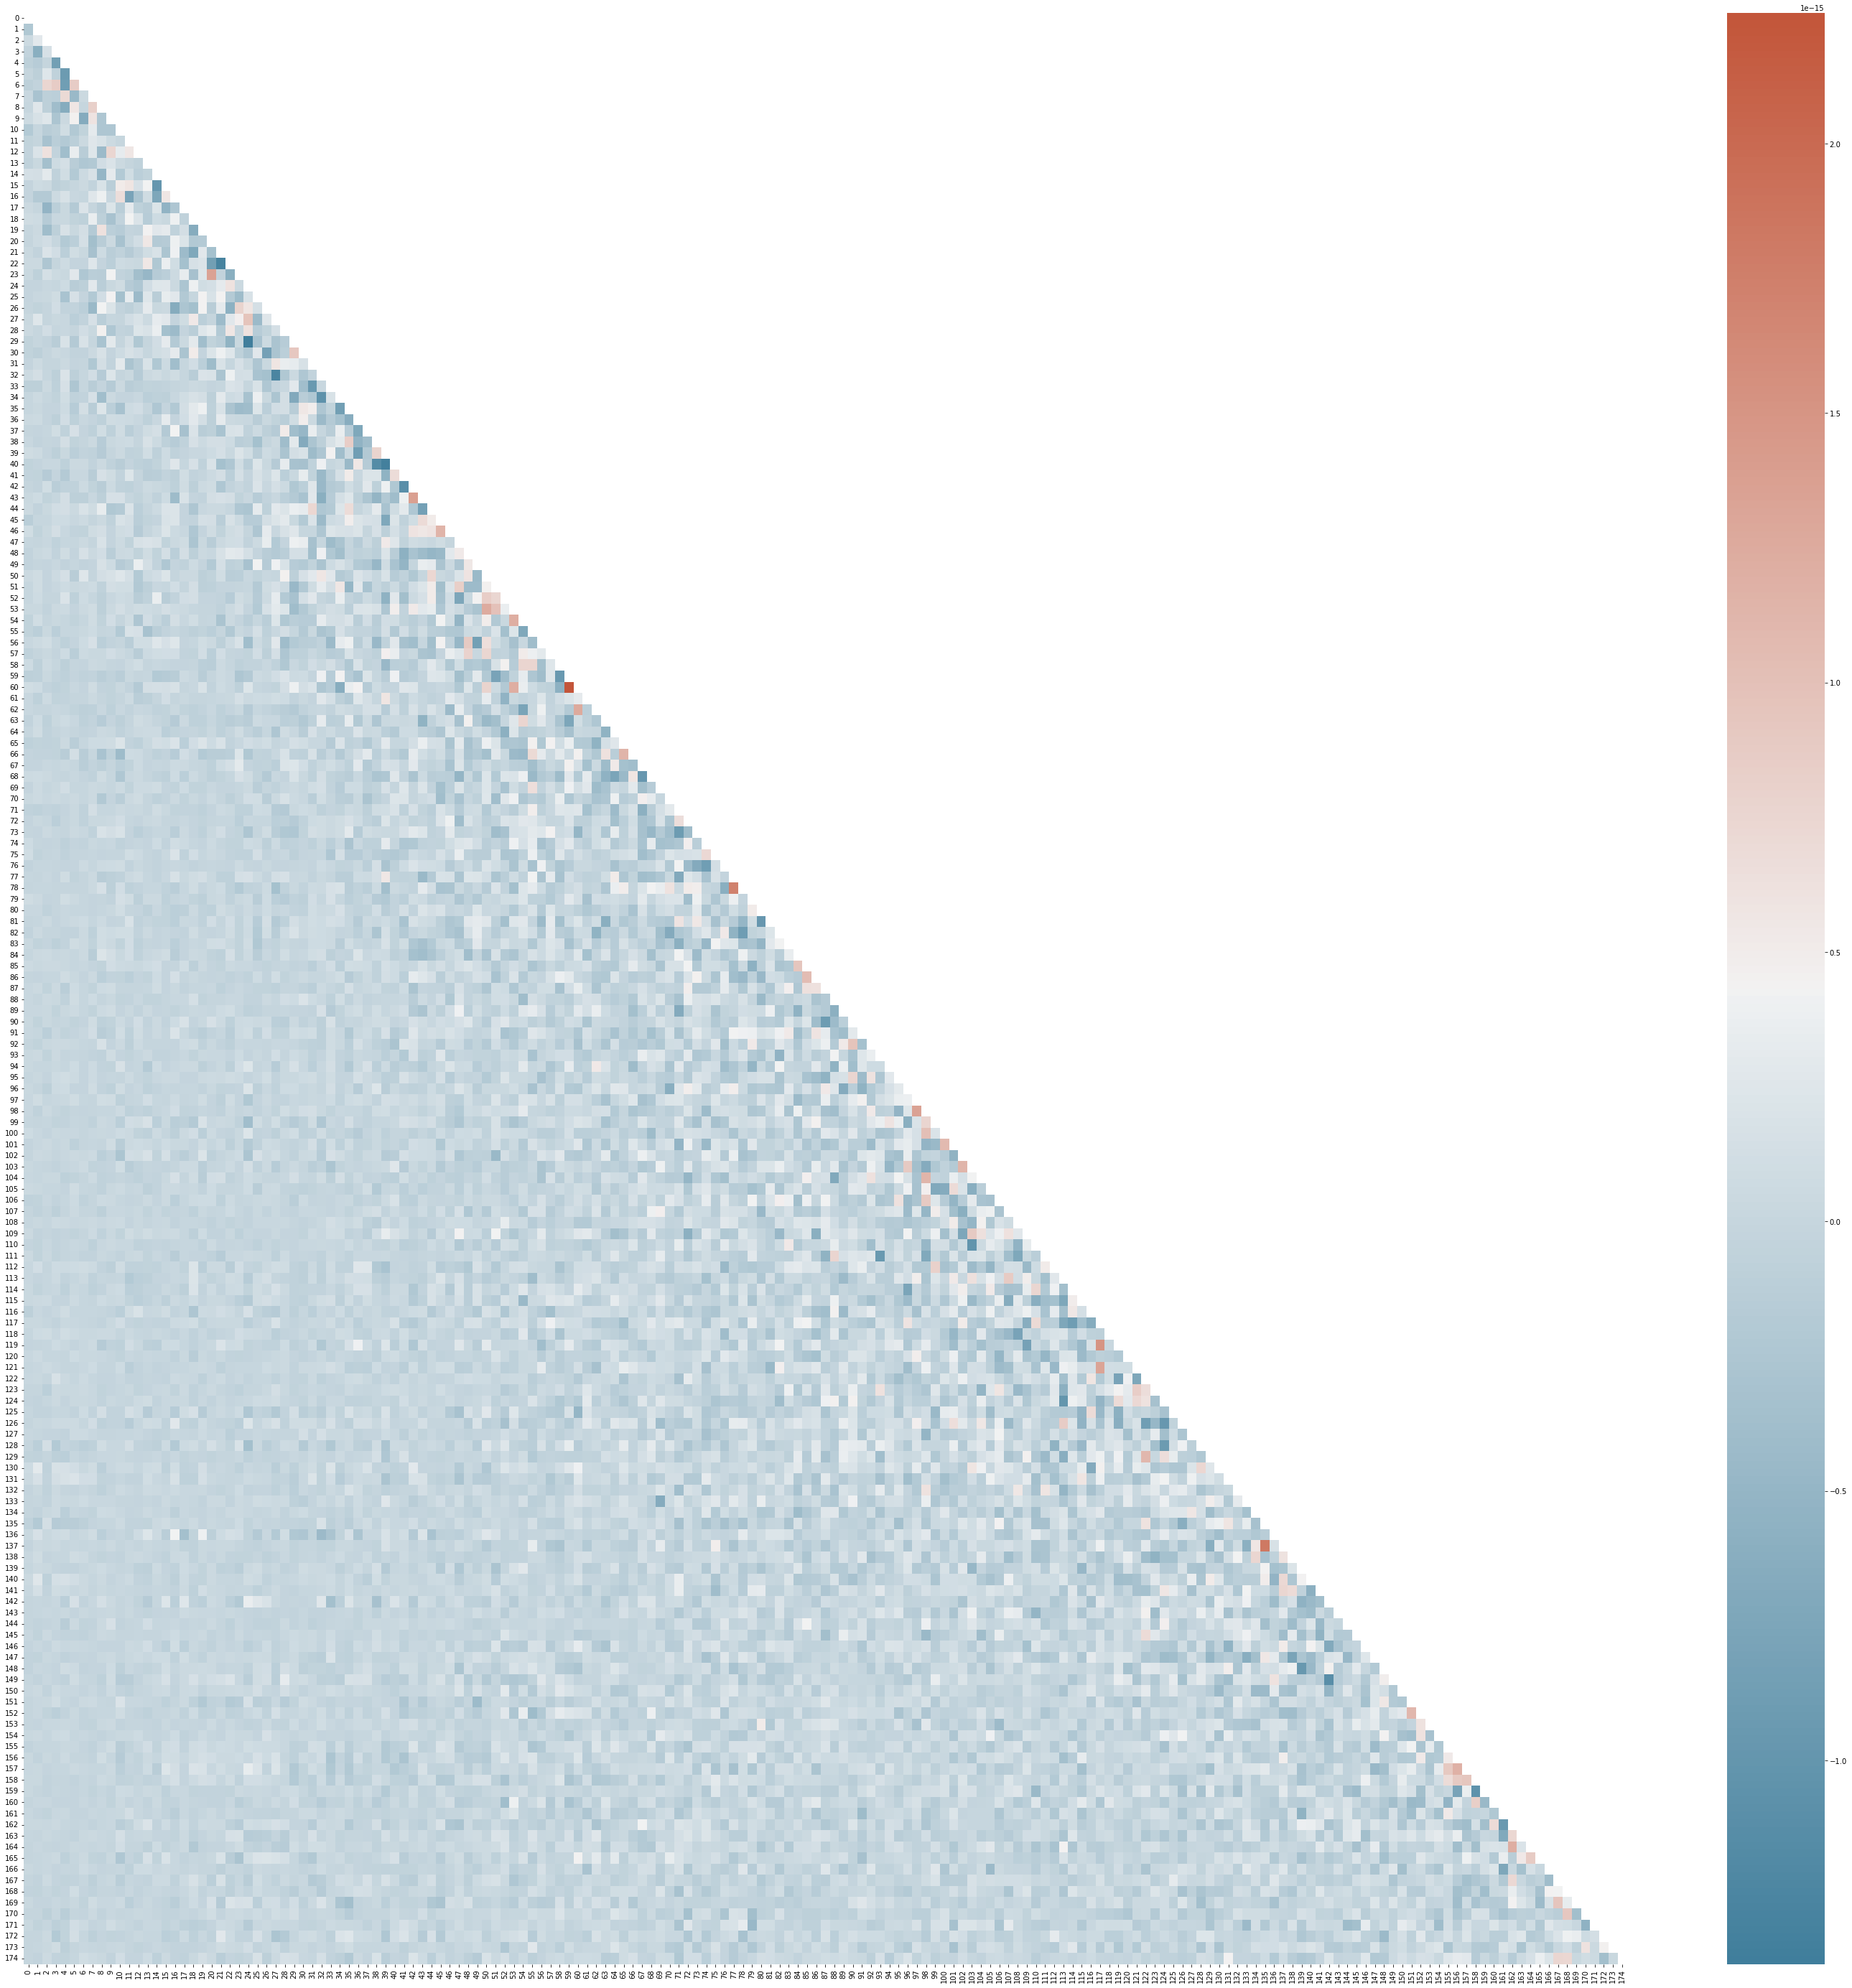

In [44]:
# Correlation between different variables
corr = pca_train_df.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(50, 50))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=False, mask = mask, cmap=cmap)


#### Dropping using correlation

In [45]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] > threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [46]:
corr_features = correlation(pca_train_df, 0.1)

In [47]:
len(set(corr_features))

0

In [48]:
pca_train_df.corr()

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,1.000000e+00,-2.233490e-16,6.359522e-17,-4.362088e-17,-9.342671e-17,-9.048533e-18,-1.041830e-16,1.725581e-17,2.850352e-18,5.856865e-17,...,-1.756233e-17,3.306573e-17,-8.348188e-18,-4.629266e-17,2.429643e-17,-8.947972e-18,3.281903e-17,-1.826762e-17,-1.292413e-17,-7.328290e-18
1,-2.233490e-16,1.000000e+00,2.788004e-16,-6.029539e-16,-1.512311e-16,-9.651368e-17,-4.364362e-17,-2.926889e-16,2.531912e-16,1.658420e-16,...,-5.764371e-18,7.027999e-18,-3.649453e-17,-4.917498e-17,-3.358838e-17,-6.432300e-18,-5.791159e-17,-1.955541e-17,-4.314382e-20,-4.001093e-17
2,6.359522e-17,2.788004e-16,1.000000e+00,1.567488e-16,-1.072136e-17,2.368771e-16,7.497101e-16,-1.025603e-16,-1.012100e-16,2.474229e-16,...,1.482765e-17,8.866765e-18,5.745657e-17,5.241430e-18,-2.452840e-17,-9.618656e-17,1.135778e-18,3.783718e-17,2.357050e-17,6.161848e-17
3,-4.362088e-17,-6.029539e-16,1.567488e-16,1.000000e+00,-8.677515e-16,-6.904516e-17,8.635577e-16,-1.121319e-16,-3.992265e-16,-2.711585e-16,...,4.577340e-17,-2.022748e-17,-2.546476e-17,-6.165113e-17,1.804007e-17,-3.595559e-18,-9.161775e-17,-1.948742e-16,8.096355e-17,-3.850294e-17
4,-9.342671e-17,-1.512311e-16,-1.072136e-17,-8.677515e-16,1.000000e+00,-9.199984e-16,-8.692006e-16,7.014352e-16,-6.536940e-16,5.005485e-17,...,-7.947698e-17,1.652497e-18,-4.963205e-17,-2.090875e-17,-9.192165e-18,-1.299171e-16,-4.994339e-17,-6.242625e-17,-9.534829e-17,-6.234269e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,-8.947972e-18,-6.432300e-18,-9.618656e-17,-3.595559e-18,-1.299171e-16,-6.640857e-18,-3.322019e-17,4.670769e-17,-3.701454e-17,1.066052e-17,...,1.038134e-17,-6.505411e-17,-1.270721e-16,9.164648e-16,-3.596770e-16,1.000000e+00,-5.674231e-16,7.807344e-17,6.122164e-16,9.811858e-17
171,3.281903e-17,-5.791159e-17,1.135778e-18,-9.161775e-17,-4.994339e-17,1.201632e-16,6.443585e-17,-3.196053e-17,1.534188e-18,9.366354e-17,...,-2.163891e-16,2.515298e-16,1.240524e-16,1.017731e-16,9.777174e-18,-5.674231e-16,1.000000e+00,1.241737e-16,4.090570e-17,6.037897e-17
172,-1.826762e-17,-1.955541e-17,3.783718e-17,-1.948742e-16,-6.242625e-17,1.238239e-16,7.997731e-18,-1.031875e-16,-2.033699e-17,-4.868009e-17,...,-1.386022e-16,7.623025e-17,2.040841e-16,4.033411e-16,3.539635e-16,7.807344e-17,1.241737e-16,1.000000e+00,4.579325e-16,-3.682239e-16
173,-1.292413e-17,-4.314382e-20,2.357050e-17,8.096355e-17,-9.534829e-17,-1.409038e-17,1.560141e-17,-5.685930e-18,-1.722141e-17,2.219815e-17,...,-1.650978e-17,-1.926557e-16,1.059757e-17,1.170793e-16,-8.979715e-17,6.122164e-16,4.090570e-17,4.579325e-16,1.000000e+00,2.251867e-17


#### Recursive Feature Elimination 

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

In [50]:
from xgboost import XGBRegressor
rfe = RFE(estimator=XGBRegressor(), n_features_to_select=10)


In [51]:
X = pca_train_df
y = train['y']

In [52]:
rfe.fit(X, y)

RFE(estimator=XGBRegressor(base_score=None, booster=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, enable_categorical=False,
                           gamma=None, gpu_id=None, importance_type=None,
                           interaction_constraints=None, learning_rate=None,
                           max_delta_step=None, max_depth=None,
                           min_child_weight=None, missing=nan,
                           monotone_constraints=None, n_estimators=100,
                           n_jobs=None, num_parallel_tree=None, predictor=None,
                           random_state=None, reg_alpha=None, reg_lambda=None,
                           scale_pos_weight=None, subsample=None,
                           tree_method=None, validate_parameters=None,
                           verbosity=None),
    n_features_to_select=10)

In [53]:
# transform the data
X1 = rfe.transform(X)

In [54]:
f = rfe.get_support(1)

In [55]:
f

array([  1,   3,   4,   5,  19,  28, 155, 158, 159, 164], dtype=int64)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import xgboost as xg

In [58]:
xregressor = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xregressor.fit(X_train, y_train)
pred = xregressor.predict(X_test)
r2_score(y_test,pred)

0.8074028691307951

In [59]:
# Predicting test dataset

In [60]:
pca_train_df.columns[1]

1

In [61]:
pca_test_df1 = pca_test_df[[1,3,4,5,19,28,155,158,159,164]]

In [62]:
xregressor.fit(X1, y)
pred_test = xregressor.predict(pca_test_df1)

In [63]:
pred_test

array([118.34643 , 101.18279 ,  75.48714 , ..., 111.859985,  88.34218 ,
       102.781235], dtype=float32)

#### Predict your test_df values using XGBoost.

In [318]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.08, 0.1, .12], #so called `eta` value
              'max_depth': [5, 7, 9],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.8],
              'n_estimators': [800,1000,1200]}

In [319]:
xgbr = XGBRegressor()


In [321]:
from sklearn.model_selection import GridSearchCV
xgbr_grid = GridSearchCV(xgbr,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgbr_grid.fit(X,y)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[21:21:06] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.8],
                         'learning_rate': [0.08, 0.1, 0.12],
                         'max_depth': [5, 7, 9], 'min_child_weight': [4],
                         'n_estimators': [800, 1000, 1200], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             verbose=True)

In [322]:
print(xgbr_grid.best_score_)
print(xgbr_grid.best_params_)

0.8081381419997312
{'colsample_bytree': 0.8, 'learning_rate': 0.08, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 1200, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [323]:
# With test test

In [324]:
xregressor.fit(X, y)
pred_test = xregressor.predict(pca_test_df)

In [327]:
pred_test

array([129.32224 ,  96.76496 ,  78.86558 , ..., 109.15072 ,  88.645164,
       106.39267 ], dtype=float32)